In [1]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

I found 1 face(s) in this photograph.
(110, 311, 239, 182)


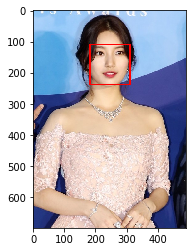

In [2]:
img = cv2.imread("face.jpg")

face_locations = face_recognition.face_locations(img)
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    print(face_location)
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

In [3]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

In [4]:
frame = cv2.imread("face.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

    

Number of faces detected: 1
[(189, 107) (314, 231)]


In [5]:
print(rects[0])
shape = predictor(gray, rects[0])
print(shape)
shape = face_utils.shape_to_np(shape)
print(shape)

[(189, 107) (314, 231)]
[[175 150]
 [175 166]
 [177 182]
 [180 198]
 [188 213]
 [199 226]
 [213 236]
 [230 243]
 [246 245]
 [262 242]
 [277 235]
 [290 224]
 [299 210]
 [303 194]
 [306 178]
 [307 161]
 [305 145]
 [192 123]
 [201 118]
 [213 116]
 [223 117]
 [234 121]
 [257 122]
 [266 118]
 [277 116]
 [287 117]
 [297 122]
 [246 138]
 [247 150]
 [247 161]
 [248 173]
 [236 183]
 [242 184]
 [248 185]
 [253 184]
 [258 182]
 [202 140]
 [210 135]
 [219 135]
 [227 142]
 [218 144]
 [209 143]
 [264 142]
 [272 134]
 [281 133]
 [288 138]
 [281 142]
 [272 142]
 [223 204]
 [232 198]
 [241 195]
 [247 196]
 [253 195]
 [261 198]
 [269 203]
 [262 212]
 [254 217]
 [248 218]
 [241 217]
 [232 214]
 [226 205]
 [241 201]
 [248 201]
 [253 201]
 [266 204]
 [253 208]
 [247 209]
 [241 209]]


<img src=facial_landmarks_68markup-768x619.jpg width=400>

Detection 0: Left: 189 Top: 107 Right: 314 Bottom: 231


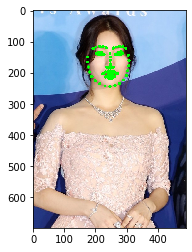

True

In [6]:
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 5, (0, 255, 0), -1)
        
imshow('', frame)
cv2.imwrite('out.jpg', frame)

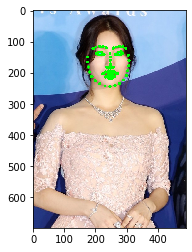

True

In [7]:
# 36~31

eyel = np.mean(shape[36:42], axis=0)
eyer = np.mean(shape[42:48], axis=0)
cv2.circle(frame, (int(eyel[0]), int(eyel[1])), 2, (255, 255, 0), -1)
cv2.circle(frame, (int(eyer[0]), int(eyer[1])), 2, (255, 255, 0), -1)

imshow("", frame)      
cv2.imwrite('out1.jpg', frame)

In [8]:
img = face_recognition.load_image_file("face.jpg")
face_encoding = face_recognition.face_encodings(img)
# print(face_encoding)
print(face_encoding[0].shape)

(128,)


In [12]:
files = os.listdir("known")   
    
known_face_encodings = []
known_face_names = []

for filename in files:
            name, ext = os.path.splitext(filename)
            if ext == '.jpg':
                known_face_names.append(name)
                pathname = os.path.join("known", filename)
                img = face_recognition.load_image_file(pathname)
                face_encoding = face_recognition.face_encodings(img)[0]
                known_face_encodings.append(face_encoding) 


In [14]:
print(known_face_names)
# print(known_face_encodings[1])

[]


In [16]:
test = face_recognition.load_image_file("face.jpg")


face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

face_names = []
for face_encoding in face_encodings:
    
     distances = face_recognition.face_distance(known_face_encodings, face_encoding)
     print(distances)
     min_value = min(distances)  

     name = "Unknown"
     if min_value < 0.6:
                    index = np.argmin(distances)
                    name = known_face_names[index]
print(name)              

[]


ValueError: min() arg is an empty sequence

In [17]:
imagePaths = list(paths.list_images("known"))
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-2]
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)
        
import pickle
data = {"encodings": knownEncodings, "names": knownNames}
f = open("known.bin", "wb")
f.write(pickle.dumps(data))
f.close()        

obama   -   known\obama\180px-Poster-sized_portrait_of_Barack_Obama.jpg
obama   -   known\obama\44_barack_obama1.jpg
obama   -   known\obama\5d6fc321240000fd0c73afcd.jpg
obama   -   known\obama\download.jpg
obama   -   known\obama\President_Barack_Obama.jpg
obama   -   known\obama\unnamed.jpg
suzy   -   known\suzy\03.21471205.1.jpg
suzy   -   known\suzy\5e22763524000031006c44ac.jpg
suzy   -   known\suzy\download.jpg
suzy   -   known\suzy\face.jpg
suzy   -   known\suzy\img1.daumcdn.jpg
suzy   -   known\suzy\sghsgh.jpg
suzy   -   known\suzy\Suzy_at_Asia_Artist_Awards_red_carpet,_16_November_2016_02.jpg
trump   -   known\trump\52C6AF0C-8D28-4E00-BEAC-7E3DC71FFCFC.jpg
trump   -   known\trump\5d897f7f24000031007b74bc.jpg
trump   -   known\trump\784e3b54-300d-4302-9e81-b385a6ac19ae.jpg
trump   -   known\trump\a6f84674-57b5-4c31-b2e0-6478ca1de139.jpg
trump   -   known\trump\download.jpg
trump   -   known\trump\FCA3C578-3BD3-49A6-8DC6-284563179EF1.jpg


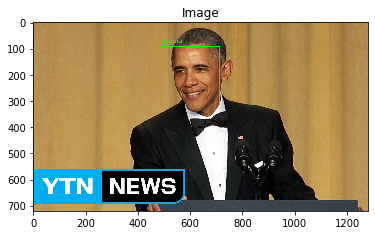

In [18]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("obama_test.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1  #get : 있으면 값을 반환하여 +1 하고, 없으면(최초) 0+1
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

In [19]:
X_train = np.array(data["encodings"])
print(X_train.shape)
Y_train = np.array(data["names"])
print(Y_train)
print(Y_train.shape)

import pandas as pd

pd.factorize(Y_train)

(19, 128)
['obama' 'obama' 'obama' 'obama' 'obama' 'obama' 'suzy' 'suzy' 'suzy'
 'suzy' 'suzy' 'suzy' 'suzy' 'trump' 'trump' 'trump' 'trump' 'trump'
 'trump']
(19,)


(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
       dtype=int64), array(['obama', 'suzy', 'trump'], dtype=object))

In [85]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation



ModuleNotFoundError: No module named 'keras'